In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# number of clusters by default 
NUM_CLUSTERS = 10

df = pd.read_excel('data.xlsx')

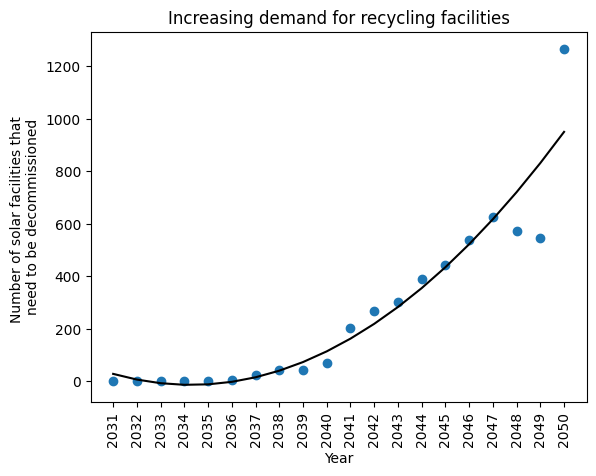

In [2]:
# demonstrating increasing num. of solar plants that need to be recycled
year_bins = np.arange(start=df['Year of Decommission'].min(),
                      stop=df['Year of Decommission'].max(),step=1)
num_plants, years = np.histogram(df['Year of Decommission'],
                                 bins=year_bins)
x = years[:-1]
plt.scatter(x, num_plants)
plt.ylabel("Number of solar facilities that \nneed to be decommissioned")
plt.xlabel("Year")
plt.title("Increasing demand for recycling facilities")
z = np.polyfit(years[:-1], num_plants, 2)
p = np.poly1d(z)
plt.xticks(x,rotation=90)
plt.plot(x, p(x), color='k')

In [3]:
# Create function which takes in a dataframe and number of clusters 
# and returns a dataframe with the weighted clusters in another column

def weightedKMeans(df, num_clusters):
    num_samples = len(df)
    if num_samples < num_clusters: 
        num_clusters = num_samples
    kmeans = KMeans(n_clusters=num_clusters, init='random', n_init=10, 
                    max_iter=300, random_state=42)
    kmeans.fit(df[['Longitude','Latitude']], 
               sample_weight=df['Capacity (MW)'])
    y_kmeans = kmeans.predict(df[['Longitude','Latitude']])
    df['Cluster'] = y_kmeans
    df['desc'] = (df['name'] + 
                  '<br>Plant Code: ' + df['code'].astype(str) + 
                  '<br>Year of installation: ' + df['installation year'].astype(str))
    return df

In [4]:
def cluster_time(df, num_clusters=NUM_CLUSTERS):
    year_bins = np.arange(start=df['Year of Decommission'].min(),
                          stop=df['Year of Decommission'].max(), 
                          step=1)
    clustered_df = []
    for year in year_bins:
        df_now = df[df['Year of Decommission']==year]
        if len(df_now) == 0:
            continue
        clustered_df.append(weightedKMeans(df_now, num_clusters))
    clustered_df = pd.concat(clustered_df)  
    # clustered_df["cluster"] = clustered_df["cluster"].astype(str) 
    return clustered_df

In [5]:
df_clustered = cluster_time(df)

C:\Users\yijin\AppData\Local\Temp\ipykernel_23024\3600909850.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = y_kmeans
C:\Users\yijin\AppData\Local\Temp\ipykernel_23024\3600909850.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['desc'] = (df['name'] +
C:\Users\yijin\AppData\Local\Temp\ipykernel_23024\3600909850.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [10]:
# visualize the data
def plot(df):
   df = df.sort_values('Year of Decommission')
   fig = px.scatter_geo(df, 
                  lon = df['Longitude'],
                  lat = df['Latitude'],
                  color = df["Cluster"],
                  hover_name=df["desc"],
                  hover_data=['Capacity (MW)','Cluster'],
                  size=df["Capacity (MW)"], 
                  animation_frame = df['Year of Decommission'],
                  projection="albers usa")
   fig.update_geos(showsubunits=True, subunitcolor='Grey')
   fig.update_layout(
        title = ('Solar plants reaching the year of decommission '+
                 '(clustered by distance and generation capacity)'),
        title_x=0.5,
        showlegend=False)
   
   return fig

In [11]:
plot(df_clustered)